# Demo: Mapping UFS Applications to UFS Baseline Data Files

__Purpose:__ 
- The purpose of the tool is to extract & map the baseline data files required (residing within the RDHPCS) for the Regression Test framework to their respective UFS Application-to-Physics Suite combination - in an effort to assist NOAA in the mapping of the current UFS baseline data files to UFS application-to-Physics Suite combination.

- Mapping of the UFS Applications to their associated configuration scripts, exported variables, set of applicable regression tests, & unique output data files will allow for developer & users to migrate/query through the datasets they need for a given:
    - UFS weather model applications
    - UFS weather model applications-to-physics suite
    - UFS regression test
    - UFS component

- In this demontration, the tool will be applied against the latest baseline dataset residing within the RDHPC platform, Orion.

__Capabilities:__ The tool will be able to perform the following actions:

- Map the baseline data files residing within the RDHPCS to their respective UFS-to-Physics Suite combination as listed in the Regression Test Framework __rt.conf__ script.

__Future Capabilities:__  
- This tool can be used to generate a reference table for users/ developers to determine the associated configuration scripts, exported variables, set of applicable regression tests, & unique output data files generated for a given:
    - UFS weather model applications 
    - UFS weather model applications-to-physics suite
    - UFS regression test

- This tool can be used to generate a reference table for users/ developers to determine associated configuration scripts, exported variables, & unique input data files required for a given:
    - UFS component
    
__Prerequisite:__

- UFS Application-to-Physics Suite Dataframe 
    - Derived from "Categorizing Input Data Files by Test.ipynb" Notebook (TODO: local to be pushed to GitHub)

- Baseline Dataframe w/ Latest Timestamped Used for Regression Test 
    - Derived from "Analytics_Tool_UFS_Datasets_PI3p2_Demo.ipynb" Notebook (GitHub)

- Input Dataframe w/ Latest Timestamped Used for Regression Test
    - Derived from "Analytics_Tool_UFS_Datasets_PI3p2_Demo.ipynb" Notebook (GitHub)


__Reference(s):__

- 

# Demo

In [1]:
if __name__ == '__main__':

    # Instantiate wrapper
    from app2bl_mapper import App2BaselineMapper

    # Merging Apps-to-Physics Combinations & their corresponding cntl directory, fv3, and parm file to dataframe.
    appsphys2test_dir = '/home/schin/project_dir/data_scraping/ufs_repo_mapped_data/'
    baseline_df_dir = '/home/schin/project_dir/data_scraping/ufs_baseline&input_dataframes/'
    input_df_dir = '/home/schin/project_dir/data_scraping/ufs_baseline&input_dataframes/'
    app2baseline_wrapper = App2BaselineMapper(appsphys2test_dir, baseline_df_dir, input_df_dir)


    # Read UFS Application-to-Physics Suite Dataframe (derived from "Categorizing Input Data Files by Test.ipynb" Notebook (local))
    """
    The App2SuiteCombo2Test.csv is comprised of the UFS Applications & their respective regression tests. It is used as a 
    main reference for mapping each unique  UFS Application-to-Physics Suite combination to their relative list of applicable
    regression tests & their respective 'CNTL foldername', /parm', 'fv3', test type (e.g. 'debug test', 'test') & additional test 
    details.
    """
    appsphys2test_df = app2baseline_wrapper.read_pickle(appsphys2test_dir + 'rt_appsphys2test_df')


    # Read latest Baseline Dataframe Used for Regression Test (derived from "Analytics_Tool_UFS_Datasets_PI3p2_Demo.ipynb" Notebook (Github))
    baseline_df = app2baseline_wrapper.read_pickle(baseline_df_dir + 'baseline_df')

    # Read latest Input Dataframe Used for Regression Test (derived from "Analytics_Tool_UFS_Datasets_PI3p2_Demo.ipynb" Notebook (Github))
    input_df = app2baseline_wrapper.read_pickle(input_df_dir + 'input_df')


# Mapping UFS Application-to-Physics Suite to Latest Baseline Files.

## Export Unique Baseline Data Files per UFS Application to CSV:
- Links Baseline Files to Appsphys2test_df of a given release via CNTL_DIR.
- Extracts associated configuration scripts, exported variables, & unique output data files (for a given UFS Application).

In [2]:
import pandas as pd

# Input Dataset's Timestamp of Interest
dataset_type, ts_of_interest = 'Baseline', '20220329'

# Extract All Data Files in Baseline Dataset's Timestamp of Interest & 
# Link Each File to Appsphys2test_df of a given release via CNTL_DIR
latest_app2test2data = pd.merge(appsphys2test_df, baseline_df[baseline_df['Date'] == ts_of_interest], on=['CNTL Folder'])

# Extract Unique Data Files per UFS Application in Input Dataset's Timestamp of Interest.
df2 = latest_app2test2data.groupby('UFS_App').apply(lambda x: x['Filename'].unique())
latest_unique_blbyapp = pd.DataFrame(df2.to_list(), index=df2.index).T

# Save Info on Baseline Dataset's Timestamp of Interest to CSV.
app2test2data_df_dir = '/home/schin/project_dir/data_scraping/ufs_app2files_map/'
with pd.ExcelWriter(f"{app2test2data_df_dir}Latest_UFSApp2{dataset_type}Map_{ts_of_interest}.xlsx") as writer:
   
    # Partition Info on Baseline Dataset's into Specified CSV sheets.
    latest_app2test2data.to_excel(writer, sheet_name=f"Latest {dataset_type} Data", index=False)
    latest_unique_blbyapp.to_excel(writer, sheet_name=f"Latest UFSApp2Unique{dataset_type}", index=False)
    

## Export merged dataframes of UFS application to Test Files & Data Files to pickle.

In [3]:
# Save merged dataframes of UFS app to Test Files & Data Files to pickle.
app2test2data_df_dir = '/home/schin/project_dir/data_scraping/ufs_app2files_map/'
app2baseline_wrapper.save2pickle(latest_app2test2data, app2test2data_df_dir + 'ufs_app2test2data_df' )
    
# Confirm: Read latest Baseline Dataframe Used for Regression Test (derived from "Analytics_Tool_UFS_Datasets_PI3p2_Demo.ipynb" Notebook (Github))
app2baseline_df = app2baseline_wrapper.read_pickle(app2test2data_df_dir + 'ufs_app2test2data_df')
app2baseline_df.head(50)

,UFS_App,Physics_Suite,Test Type,Test Name,Test Info,CNTL Folder,FV3 File,Parm File,Date,Compiler,...,Res (C),Res (km),Couple Res,DataType,input_or_restart,Nodes Relative to Main,Node0,Node1,Node2,Node3
0,S2SW,FV3_GFS_v16_coupled_nsstNoahmpUGWPv1,tests,cpld_control_p8,"{'CNTL_DIR': 'cpld_control_p8', 'RESTART_N': '...",cpld_control_p8,cpld_control_run.IN,NaN,20220329,INTEL,...,NaN,NaN,NaN,nc,NaN,3,develop-20220329,INTEL,cpld_control_p8,None
1,S2SW,FV3_GFS_v16_coupled_nsstNoahmpUGWPv1,tests,cpld_control_p8,"{'CNTL_DIR': 'cpld_control_p8', 'RESTART_N': '...",cpld_control_p8,cpld_control_run.IN,NaN,20220329,INTEL,...,NaN,NaN,NaN,nc,NaN,3,develop-20220329,INTEL,cpld_control_p8,None
2,S2SW,FV3_GFS_v16_coupled_nsstNoahmpUGWPv1,tests,cpld_control_p8,"{'CNTL_DIR': 'cpld_control_p8', 'RESTART_N': '...",cpld_control_p8,cpld_control_run.IN,NaN,20220329,INTEL,...,NaN,NaN,NaN,nc,NaN,3,develop-20220329,INTEL,cpld_control_p8,None
3,S2SW,FV3_GFS_v16_coupled_nsstNoahmpUGWPv1,tests,cpld_control_p8,"{'CNTL_DIR': 'cpld_control_p8', 'RESTART_N': '...",cpld_control_p8,cpld_control_run.IN,NaN,20220329,INTEL,...,NaN,NaN,NaN,nc,NaN,3,develop-20220329,INTEL,cpld_control_p8,None
4,S2SW,FV3_GFS_v16_coupled_nsstNoahmpUGWPv1,tests,cpld_control_p8,"{'CNTL_DIR': 'cpld_control_p8', 'RESTART_N': '...",cpld_control_p8,cpld_control_run.IN,NaN,20220329,INTEL,...,NaN,NaN,NaN,nc,NaN,3,develop-20220329,INTEL,cpld_control_p8,None
5,S2SW,FV3_GFS_v16_coupled_nsstNoahmpUGWPv1,tests,cpld_control_p8,"{'CNTL_DIR': 'cpld_control_p8', 'RESTART_N': '...",cpld_control_p8,cpld_control_run.IN,NaN,20220329,INTEL,...,NaN,NaN,NaN,nc,NaN,3,develop-20220329,INTEL,cpld_control_p8,None
6,S2SW,FV3_GFS_v16_coupled_nsstNoahmpUGWPv1,tests,cpld_control_p8,"{'CNTL_DIR': 'cpld_control_p8', 'RESTART_N': '...",cpld_control_p8,cpld_control_run.IN,NaN,20220329,INTEL,...,NaN,NaN,NaN,NaN,NaN,3,develop-20220329,INTEL,cpld_control_p8,None
7,S2SW,FV3_GFS_v16_coupled_nsstNoahmpUGWPv1,tests,cpld_control_p8,"{'CNTL_DIR': 'cpld_control_p8', 'RESTART_N': '...",cpld_control_p8,cpld_control_run.IN,NaN,20220329,INTEL,...,NaN,NaN,NaN,nc,NaN,3,develop-20220329,INTEL,cpld_control_p8,None
8,S2SW,FV3_GFS_v16_coupled_nsstNoahmpUGWPv1,tests,cpld_control_p8,"{'CNTL_DIR': 'cpld_control_p8', 'RESTART_N': '...",cpld_control_p8,cpld_control_run.IN,NaN,20220329,INTEL,...,NaN,NaN,NaN,nc,NaN,3,develop-20220329,INTEL,cpld_control_p8,None
9,S2SW,FV3_GFS_v16_coupled_nsstNoahmpUGWPv1,tests,cpld_control_p8,"{'CNTL_DIR': 'cpld_control_p8', 'RESTART_N': '...",cpld_control_p8,cpld_control_run.IN,NaN,20220329,INTEL,...,NaN,NaN,NaN,nc,NaN,3,develop-20220329,INTEL,cpld_control_p8,None


In [13]:
app2baseline_df.columns

Index(['UFS_App', 'Physics_Suite', 'Test Type', 'Test Name', 'Test Info',
       'CNTL Folder', 'FV3 File', 'Parm File', 'Date', 'Compiler',
       'Relative Directory', 'Filename', 'Size (Bytes)', 'Size (GB)',
       'Res (C)', 'Res (km)', 'Couple Res', 'DataType', 'input_or_restart',
       'Nodes Relative to Main', 'Node0', 'Node1', 'Node2', 'Node3'],
      dtype='object')

# Data Storage: UFS Application-to-Latest Baseline Data Files

,Size (GB)
UFS_App,
ATM,1057.6
ATMW,40.7
HAFS-ALL,9.6
HAFSW,42.3
NG-GODAS,44.6
S2S,4.3
S2SW,962.1


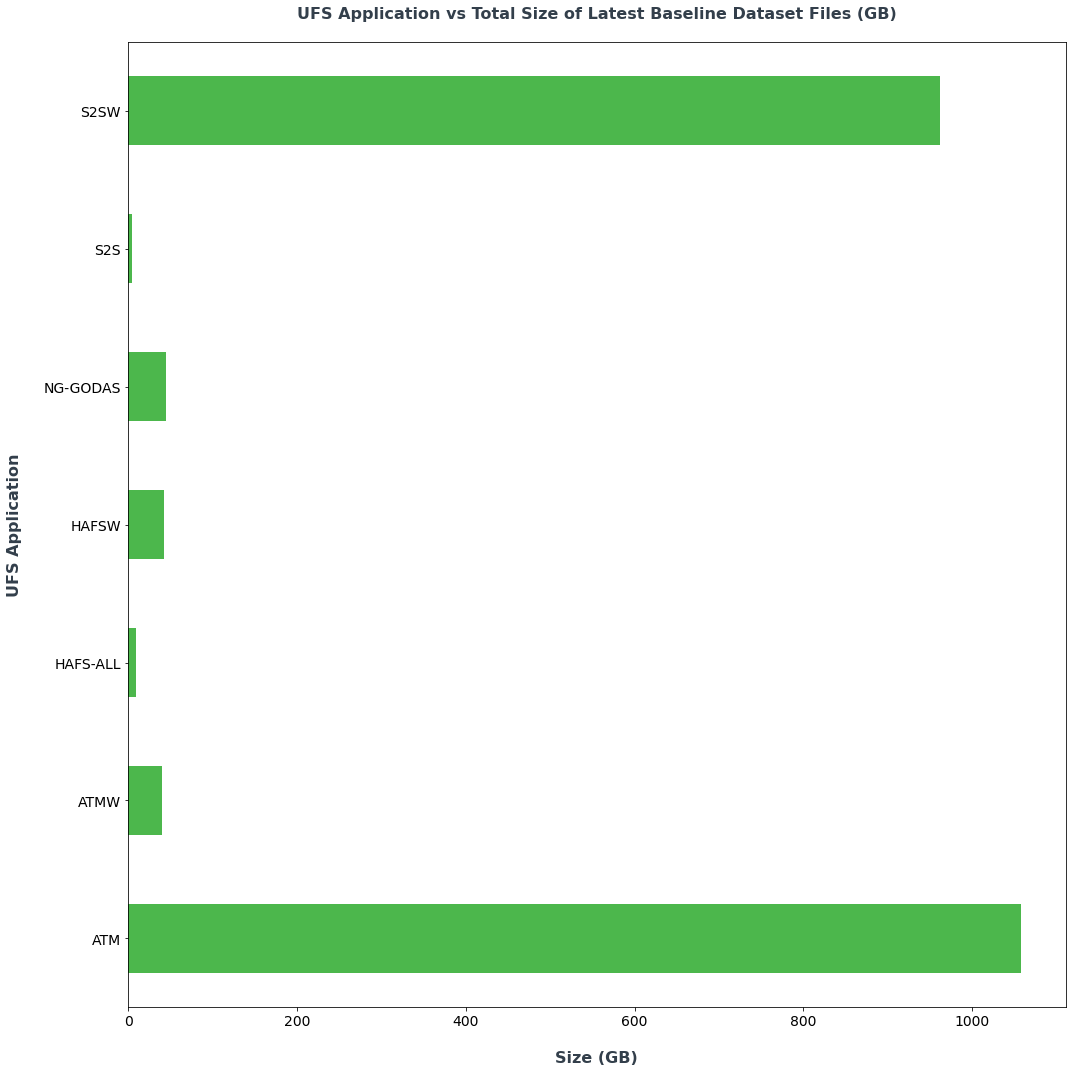

In [5]:
baseline_sz_perapp2phys = app2baseline_wrapper.get_bl_storage_size(app2baseline_df)
baseline_sz_perapp2phys

### Extract associated  configuration scripts, exported variables, & unique output data files (for a given regression test)

In [6]:
# Extract associated configuration scripts, exported variables, & unique output data files for a given regression test
test_name = 'control_2threads_debug'
app2baseline_df[app2baseline_df['Test Name'] == test_name]['Filename'].unique()

array(['sfcf001.nc', 'atmf000.nc', 'sfcf000.nc', 'atmf001.nc'],
      dtype=object)

### Extract associated configuration scripts, exported variables, set of applicable regression tests, & unique output data files (for a given UFS application)

In [7]:
# Each UFS Applications associated configuration scripts, exported variables, set of applicable regression tests, & unique output data files
app_name = 'ATM'
app2baseline_df[app2baseline_df['UFS_App'] == app_name][['UFS_App', 'Physics_Suite', 'CNTL Folder', 'Filename',  'Relative Directory', 'FV3 File', 'Parm File', 'Test Info']]['Filename'].unique()

array(['GFSFLX.GrbF21', 'GFSFLX.GrbF00', 'atmf021.nc', 'atmf000.nc',
       'sfcf000.nc', 'GFSPRS.GrbF00', 'atmf024.nc', 'GFSPRS.GrbF21',
       'GFSFLX.GrbF24', 'sfcf021.nc', 'sfcf024.nc', 'GFSPRS.GrbF24',
       'fv_core.res.tile4.nc', 'fv_core.res.tile6.nc',
       'fv_srf_wnd.res.tile6.nc', 'fv_tracer.res.tile6.nc',
       'fv_srf_wnd.res.tile3.nc', 'fv_core.res.nc',
       'fv_core.res.tile1.nc', 'sfc_data.tile4.nc', 'sfc_data.tile5.nc',
       'fv_core.res.tile3.nc', 'fv_srf_wnd.res.tile2.nc',
       'phy_data.tile4.nc', 'fv_tracer.res.tile4.nc', 'sfc_data.tile2.nc',
       'fv_core.res.tile2.nc', 'phy_data.tile2.nc',
       'fv_srf_wnd.res.tile1.nc', 'phy_data.tile5.nc',
       'phy_data.tile3.nc', 'phy_data.tile1.nc', 'fv_tracer.res.tile5.nc',
       'coupler.res', 'fv_srf_wnd.res.tile5.nc',
       'fv_srf_wnd.res.tile4.nc', 'sfc_data.tile3.nc',
       'fv_tracer.res.tile1.nc', 'fv_tracer.res.tile2.nc',
       'phy_data.tile6.nc', 'sfc_data.tile1.nc', 'fv_tracer.res.tile3.nc',


### Additional Information: Unique RegressionTests Present

In [8]:
print(f"There are {len(app2baseline_df['Test Name'].unique())} Unique regression tests present in this baseline dataset.")

There are 115 Unique regression tests present in this baseline dataset.


In [9]:
print(f"List of unique regression tests present in this baseline dataset.")
app2baseline_df['Test Name'].unique()

List of unique regression tests present in this baseline dataset.


array(['cpld_control_p8', 'cpld_2threads_p8', 'cpld_decomp_p8',
       'cpld_mpi_p8', 'cpld_control_p7_rrtmgp', 'cpld_bmark_p7',
       'cpld_bmark_p8', 'cpld_control_c96_p8', 'cpld_restart_c96_p8',
       'cpld_control_c192_p8', 'cpld_restart_c192_p8',
       'cpld_control_c384_p8', 'cpld_restart_c384_p8', 'cpld_debug_p8',
       'control', 'control_decomp', 'control_2threads', 'control_restart',
       'control_fhzero', 'control_CubedSphereGrid', 'control_latlon',
       'control_wrtGauss_netcdf_parallel', 'control_c48', 'control_c192',
       'control_c384', 'control_c384gdas', 'control_stochy',
       'control_stochy_restart', 'control_lndp', 'control_p8',
       'control_restart_p8', 'control_decomp_p8', 'control_2threads_p8',
       'control_p7_rrtmgp', 'regional_control', 'regional_restart',
       'regional_2threads', 'regional_noquilt', 'regional_hafs',
       'regional_netcdf_parallel', 'regional_RRTMGP', 'control_debug',
       'control_2threads_debug', 'control_CubedSphereG

__Findings:__ 
- Each release, will utilize a timestamped baseline, in which each baseline dataset will vary in the number CNTL datasets they have. 

__TODO:__ When scraping each relevant UFS repo release will have to:
- Link "UFS repo release" to "BL_Date" to the unique app2baseline_df because each baseline dataset will vary in the number CNTL datasets per release version

# Mapping UFS Component to Latest Input Data Files.

## Export Unique Input Data Files per UFS Component to CSV:
- Extracts associated configuration scripts, exported variables, & unique input data files (for a given UFS component)

In [10]:
# Extract each UFS component's associated configuration scripts, exported variables, & unique input data files

# Input Dataset's Timestamp of Interest
ts_of_interest = '20211210'
dataset_type = 'Input'

# Extract All Data Files in Input Dataset's Timestamp of Interest.
latest_input_df = input_df[input_df['Date'] == ts_of_interest]

# Extract Unique Data Files per UFS Application in Input Dataset's Timestamp of Interest.
df2 = latest_input_df.groupby('UFS Component').apply(lambda x: x['Filename'].unique())
latest_unique_inputbycomp = pd.DataFrame(df2.to_list(), index=df2.index).T

# Save Info on Input Dataset's Timestamp of Interest to CSV.
comp2data_dir = '/home/schin/project_dir/data_scraping/ufs_comp2files_map/'
with pd.ExcelWriter(f"{comp2data_dir}Latest_UFSComponent2{dataset_type}Map_{ts_of_interest}.xlsx") as writer:
   
    # Partition Info on Input Dataset's into Specified CSV sheets.
    latest_input_df.to_excel(writer, sheet_name=f"Latest {dataset_type} Data", index=False)
    latest_unique_inputbycomp.to_excel(writer, sheet_name=f"Latest UFSComp2Unique{dataset_type}", index=False)
    

In [11]:
# Save filtered UFS component to input data files map to pickle.
comp2data_dir = '/home/schin/project_dir/data_scraping/ufs_comp2files_map/'
app2baseline_wrapper.save2pickle(latest_unique_inputbycomp, comp2data_dir + 'ufs_comp2data_df')
    
# Confirm: Read latest Baseline Dataframe Used for Regression Test (derived from "Analytics_Tool_UFS_Datasets_PI3p2_Demo.ipynb" Notebook (Github))
comp2input_df = app2baseline_wrapper.read_pickle(comp2data_dir + 'ufs_comp2data_df')
comp2input_df.head()

UFS Component,CICE,CPL,DATM,FV3,FV3_HAFS,FV3_REGIONAL,GOCART,HYCOM_REGIONAL,MOM6,WW3
0,cice_model_1.00.cpc.res_2011100100.nc,grid_spec.nc,cfsr_mesh.nc,qr_acr_qs,global_mxsnoalb.uariz.t1534.3072.1536.rg.grb,grid.tile7.halo4.nc,CAP.rc,forcing.airtmp.a,topo_edits_011818.nc,mod_def.glo_15mxt
1,cice_model_1.00.cpc.res_20210322.nc,None,cfsr.2011100100.nc,global_soiltype.statsgo.t126.384.190.rg.grb,global_vegtype.igbp.t1534.3072.1536.rg.grb,oro_data.tile7.halo4.nc,NI2G_GridComp_NI.rc,forcing.vapmix.b,layer_coord.nc,mod_def.gsh_15m
2,cice_model_4.00.cpc.res_20210322.nc,None,cfsr.2011100106.nc,qr_acr_qg,global_snowfree_albedo.bosu.t1534.3072.1536.rg...,sfc_data.nc,AGCM.rc,patch.input,ocean_mask.nc,mod_def.ant_9km
3,cice_model_0.50.cpc.res_20210322.nc,None,cfsr.2011100206.nc,ugwp_c384_tau.nc,global_soilmgldas.t1534.3072.1536.grb,gfs_ctrl.nc,SS2G_GridComp_SS.rc,relax.ssh.b,topog.nc,mod_def.natl_6m
4,cice_model_0.25.cpc.res_2011100100.nc,None,cfsr.2011100118.nc,SOILPARM.TBL,global_snoclim.1.875.grb,C768_grid.tile7.nc,GOCART2G_GridComp.rc,forcing.chl.b,interpolate_zgrid_40L.nc,mod_def.glo_1deg
